In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import hstack
from gensim import parsing

In [2]:
#Instantiate and setup DataFrame
df = pd.read_csv('..\\data\\X.csv')
df.set_index('LISTING_ID', inplace = True, drop = True)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9
LISTING_ID,,,,,,,,,,
7075306172,0.917307,0.618685,0.192444,0.099921,0.206868,1.907992,-0.589809,0.425400,0.937936,-0.663455
7075321793,2.725348,0.182099,0.599635,-0.153622,0.743383,1.879798,-0.662512,0.086399,1.158547,-0.440024
7075372720,2.359884,0.124991,0.296978,0.079791,0.647150,1.813236,-0.542062,0.057395,1.010028,-0.771719
7075376264,2.359883,0.124993,0.296990,0.079790,0.647147,1.813213,-0.542055,0.057393,1.010026,-0.771720
7075380613,2.289303,0.146787,0.165366,0.345773,0.798692,1.715030,-0.397729,0.132051,1.198907,-0.484457


#### K-Means

In [ ]:
#Determine number of clusters

In [5]:
inertia_list = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters = k, random_state = 33)
    km.fit(df)
    inertia_list.append(km.inertia_)

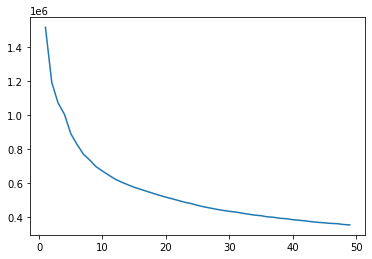

In [6]:
plt.plot(K, inertia_list)

In [117]:
#### Include Average Silhouette Method and Gap Statistic

In [41]:
km = KMeans(n_clusters = , random_state = 33)
km_df = pd.DataFrame(km.fit_transform(df))
km_df.head()

,0,1,2,3,4,5,6,7,8,9
0,2.448714,2.117872,0.513867,4.100073,2.427687,2.403172,2.640018,2.058338,2.309617,2.862813
1,2.561005,2.173200,0.789541,4.480448,2.473455,2.175799,2.652662,2.147726,2.339516,3.175165
2,2.533206,2.115958,0.670137,4.185687,2.374812,2.384700,2.555280,2.088395,2.359840,2.945102
3,2.533206,2.115958,0.670137,4.185687,2.374812,2.384700,2.555280,2.088395,2.359840,2.945102
4,2.555843,2.106722,0.707708,3.897036,2.310134,2.621148,2.484905,2.081358,2.430263,2.737245


In [42]:
km_df.set_index(features_unscaled.index, inplace = True)
km_df['Cluster'] = km.labels_
km_df.head()

,0,1,2,3,4,5,6,7,8,9,Cluster
LISTING_ID,,,,,,,,,,,
7075306172,2.448714,2.117872,0.513867,4.100073,2.427687,2.403172,2.640018,2.058338,2.309617,2.862813,2
7075321793,2.561005,2.173200,0.789541,4.480448,2.473455,2.175799,2.652662,2.147726,2.339516,3.175165,2
7075372720,2.533206,2.115958,0.670137,4.185687,2.374812,2.384700,2.555280,2.088395,2.359840,2.945102,2
7075376264,2.533206,2.115958,0.670137,4.185687,2.374812,2.384700,2.555280,2.088395,2.359840,2.945102,2
7075380613,2.555843,2.106722,0.707708,3.897036,2.310134,2.621148,2.484905,2.081358,2.430263,2.737245,2


<BarContainer object of 10 artists>

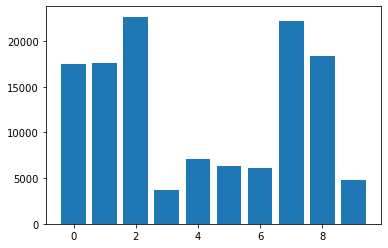

In [43]:
plt.bar(km_df.Cluster.value_counts().index, km_df.Cluster.value_counts())

#### DBSCAN

In [33]:
db = DBSCAN(eps=0.7, min_samples=100)
db.fit(X)

DBSCAN(eps=0.7, min_samples=100)

<BarContainer object of 5 artists>

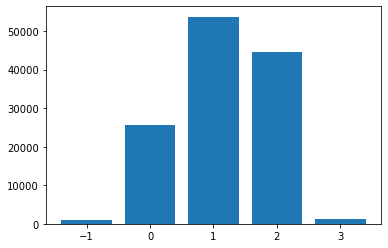

In [34]:
db_label_counts = pd.Series(db.labels_).value_counts().sort_index()
plt.bar(db_label_counts.index, db_label_counts)